# Cyril's Dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Annee,PermNonPermPop_CD,PermNonPermPop,GroupeEtrangers_CD,GroupeEtrangers,Autorisation_CD,Autorisation,GroupeAge_CD,GroupeAge,DureeSejour_CD,...,Sexe,CantonHabitation_CD,CantonHabitation,Nation_CD,Nation,Continent_CD,Continent,EuropeEtatsTiers_CD,EuropeEtatsTiers,NombrePersonnes
0,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,1,Zurich,236,Espagne,1,Europe,1,UE,1
1,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,204,Belgique,1,Europe,1,UE,1
2,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,206,Danemark,1,Europe,1,UE,1
3,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,218,Italie,1,Europe,1,UE,3
4,2023,1,Population permanente étrangère,1,Permis de courte durée (L) >= 12 mois,1,Autorisation UE/AELE,1,00 - 05 ans,1,...,Hommes,2,Berne,232,Roumanie,1,Europe,1,UE,1


In [4]:
yearly_immigration = df.groupby('Annee')['NombrePersonnes'].count()
yearly_immigration

Annee
2020    88574
2021    91397
2022    93908
2023    96672
Name: NombrePersonnes, dtype: int64

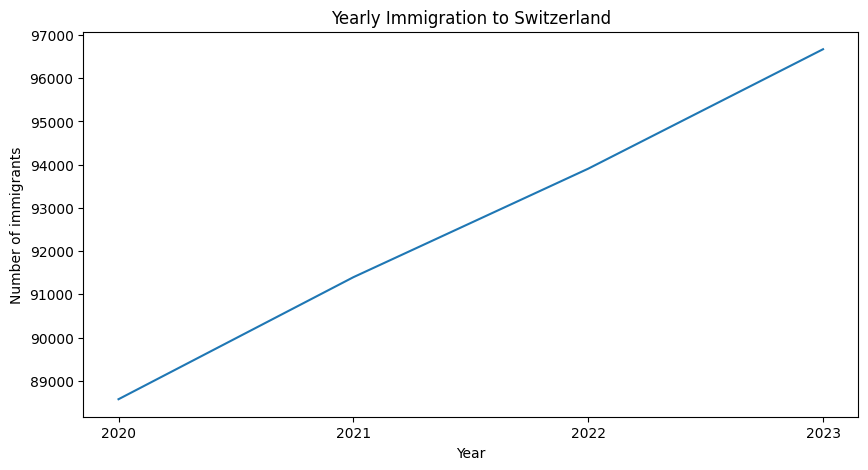

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_immigration.index, yearly_immigration.values)
plt.title('Yearly Immigration to Switzerland')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.xticks(np.arange(2020, 2024, 1))
plt.show()

In [6]:
yearly_imm_by_country = df.groupby(['Annee', 'Nation'])['NombrePersonnes'].count().unstack()
yearly_imm_by_country

Nation,Afghanistan,Afrique du sud,Albanie,Algérie,Allemagne,Andorre,Angola,Antigua-et-Barbuda,Apatride,Arabie saoudite,...,Yémen,Zambie,Zimbabwe,Égypte,Émirats arabes unis,Équateur,Érythrée,État inconnu,États-unis d'Amérique,Éthiopie
Annee,,,,,,,,,,,,,,,,,,,,,
2020,817.0,605.0,602.0,670.0,2007.0,20.0,469.0,12.0,284.0,149.0,...,198.0,55.0,141.0,556.0,16.0,509.0,1120.0,379.0,1642.0,635.0
2021,871.0,593.0,631.0,672.0,2046.0,24.0,464.0,10.0,294.0,153.0,...,204.0,60.0,141.0,568.0,18.0,532.0,1160.0,393.0,1628.0,679.0
2022,973.0,613.0,650.0,700.0,2023.0,34.0,464.0,20.0,326.0,159.0,...,218.0,63.0,139.0,598.0,20.0,539.0,1216.0,391.0,1689.0,698.0
2023,1039.0,644.0,705.0,724.0,2060.0,41.0,473.0,23.0,384.0,164.0,...,231.0,61.0,146.0,595.0,27.0,546.0,1259.0,414.0,1733.0,733.0


In [7]:
fig = px.line(yearly_imm_by_country, title='Yearly immigration to Switzerland by country')
# Modify x-ticks
fig.update_xaxes(tickvals=np.arange(2020, 2024, 1))
fig.show()